# User interaction/events

# Data = source from an app or system usage log from a user

# ✅ Step-by-Step Project Pipeline:
1. Define the Problem/Goal
* Ask: What do you want to learn or predict?
Examples:

* Are you trying to predict app crashes?

* Analyze user behavior patterns?

* Understand network usage trends?

* Recommend updates for apps?

* Example Objective: "Identify the patterns that lead to app crashes."

# 🔮 1. Predict App Update Outcome (Supervised ML)
- Target: Update Status
Use the other features (App Name, Event Type, Time, Network Type, etc.) to predict whether an update will be a "Success", "Failed", or "Not Checked".

- ✅ Great for classification models like Logistic Regression, Random Forest, or XGBoost.

# 🧠 2. Usage Pattern Insights (Descriptive + Clustering)
* What time of day users open apps most?

* Which apps are frequently updated?

* Do certain networks (e.g., 5G vs. Wi-Fi) lead to better update success?

* Use clustering (KMeans) to group similar usage behavior — e.g., people who mostly open social apps late at night on 5G.

# ⏱️ 3. Time-Based Trends
- Are updates more likely at night or day?

- Does the failure rate of updates increase on certain network types?

- Visualize trends like:

- App installs over time.

- Update success/failure over days or hours.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb


In [ ]:
df= pd.read_csv("/content/meta_app_manager_large_dataset.csv")

In [ ]:
df

,Timestamp,App Name,Event Type,Device Model,OS Version,Network Type,Update Status
0,2025-04-20 02:58 PM,WhatsApp,App Opened,OPPO F21 Pro,Android 13,5G,Not Checked
1,2025-04-20 08:09 PM,Instagram,App Updated,OPPO F21 Pro,Android 13,3G,Failed
2,2025-04-21 02:22 AM,Instagram,App Unused 24h,OPPO F21 Pro,Android 13,5G,Success
3,2025-04-21 03:03 AM,Facebook,App Installed,OPPO F21 Pro,Android 13,Wi-Fi,Success
4,2025-04-21 06:24 AM,Messenger,App Installed,OPPO F21 Pro,Android 13,5G,Success
...,...,...,...,...,...,...,...
495,2025-04-20 10:17 AM,WhatsApp,App Updated,OPPO F21 Pro,Android 13,Wi-Fi,Not Checked
496,2025-04-20 07:46 PM,Instagram,App Crashed,OPPO F21 Pro,Android 13,4G LTE,Up-to-date
497,2025-04-20 08:30 AM,Facebook,App Unused 24h,OPPO F21 Pro,Android 13,3G,Up-to-date
498,2025-04-21 02:27 AM,WhatsApp,App Installed,OPPO F21 Pro,Android 13,Wi-Fi,Success


 • 🔍 Columns:
* Timestamp – When the event occurred.

* App Name – Which app the event is related to.

* Event Type – Type of action/event (e.g., install, open, crash).

* Device Model – The model of the user's device.

* OS Version – The operating system version.

* Network Type – Wi-Fi, 4G, 5G, etc.

* Update Status – Whether the app is updated or not.

# Data Cleaning & Preprocessing
✅ Common tasks:

Handle missing/null values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      500 non-null    object
 1   App Name       500 non-null    object
 2   Event Type     500 non-null    object
 3   Device Model   500 non-null    object
 4   OS Version     500 non-null    object
 5   Network Type   500 non-null    object
 6   Update Status  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Timestamp,500,419,2025-04-20 11:23 PM,3
App Name,500,4,Facebook,129
Event Type,500,5,App Crashed,105
Device Model,500,1,OPPO F21 Pro,500
OS Version,500,1,Android 13,500
Network Type,500,4,5G,134
Update Status,500,4,Success,140


In [ ]:
df.isnull().sum()

,0
Timestamp,0
App Name,0
Event Type,0
Device Model,0
OS Version,0
Network Type,0
Update Status,0
Hour,0
DayOfWeek,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
#  Drop in Place (Without Reassignment):
df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()


np.int64(0)

- Convert Timestamp into features (e.g., hour, day, weekday)

In [ ]:
# Convert Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# Feature engineering
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# 📊 STEP 1: EDA & Feature Engineering

In [ ]:
# Quick EDA
print(df['Update Status'].value_counts())


Update Status
Success        140
Up-to-date     132
Not Checked    121
Failed         107
Name: count, dtype: int64


In [ ]:
df['Event Type'].value_counts()

,count
Event Type,
App Crashed,105
App Unused 24h,103
App Installed,102
App Updated,97
App Opened,93


# Exploratory Data Analysis (EDA)
📊 Visualize to get insights:


Crashes by device model

Event frequency over time

Network types vs. update status



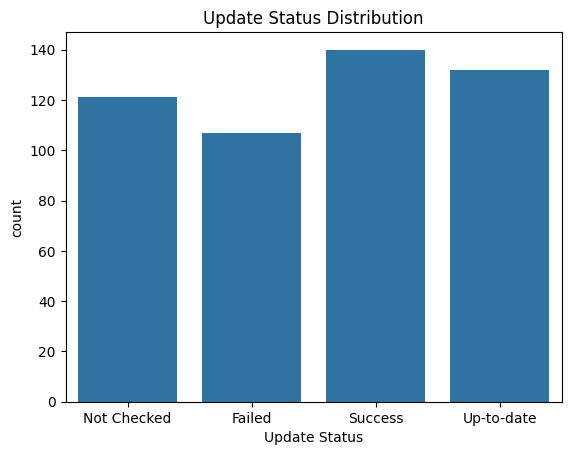

In [ ]:
# Plot: Update Status distribution
sns.countplot(data=df, x='Update Status')
plt.title("Update Status Distribution")
plt.xlabel("Update Status")
plt.ylabel("No of Users (Counts)")
plt.show()

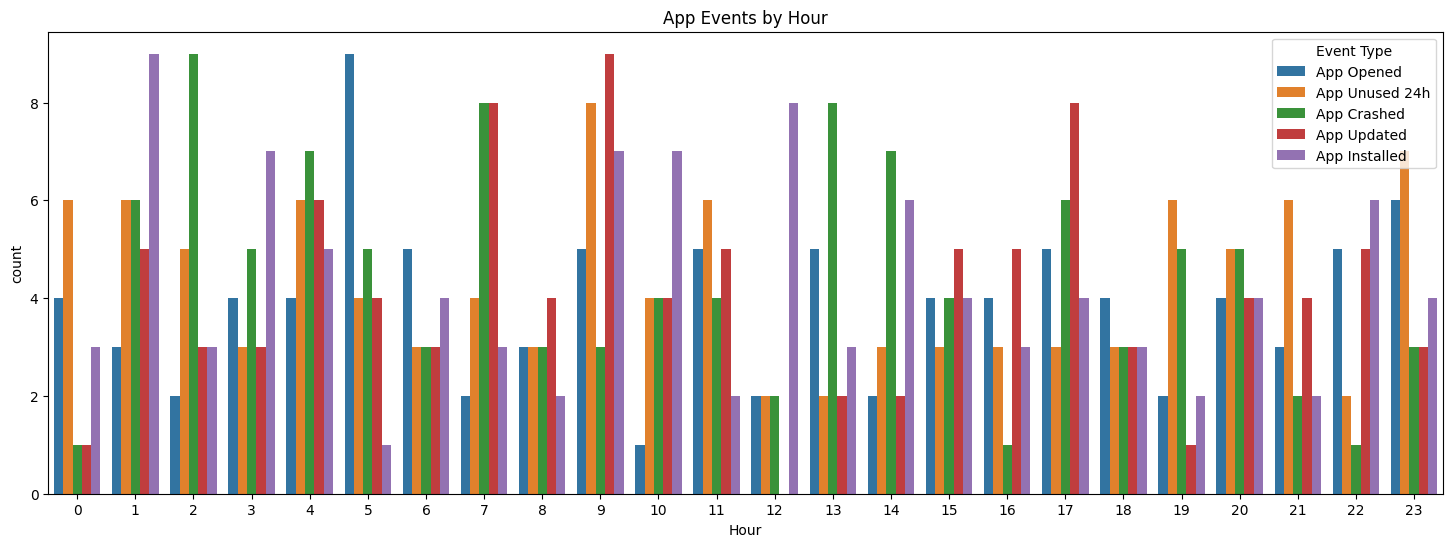

In [ ]:

# Plot: App usage by hour
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Hour', hue='Event Type')
plt.title("App Events by Hour of Day")
plt.show()

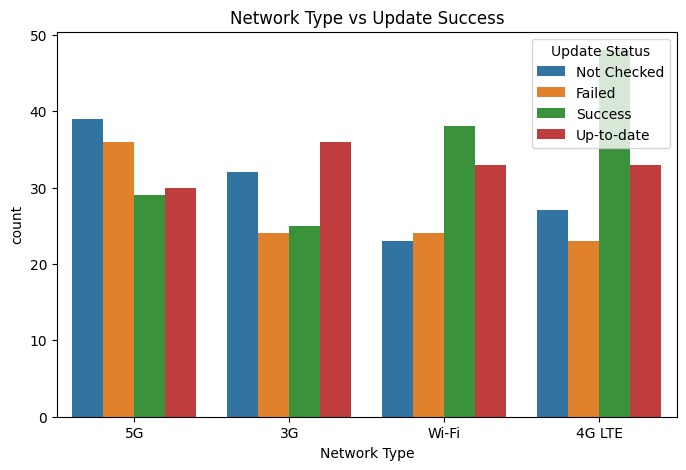

In [ ]:

# Plot: Network Type vs Update Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Network Type', hue='Update Status')
plt.title("Network Type vs Update Success")
plt.show()


# 🎯 STEP 2: Modeling – Predict Update Status
Encode categorical features:

In [ ]:
features = ['App Name', 'Event Type', 'Device Model', 'OS Version', 'Network Type', 'Hour', 'DayOfWeek']
target = 'Update Status'

# Encode categorical features
df_encoded = df[features + [target]].copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


## Train/test split + model:

In [ ]:
X = df_encoded.drop('Update Status', axis=1)
y = df_encoded['Update Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

print(confusion_matrix(y_test, y_pred))

[[ 0  4 11  7]
 [ 8  1 10  6]
 [ 6  5  7  4]
 [ 9  7  7  8]]


In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.06      0.04      0.05        25
           2       0.20      0.32      0.25        22
           3       0.32      0.26      0.29        31

    accuracy                           0.16       100
   macro avg       0.14      0.15      0.14       100
weighted avg       0.16      0.16      0.15       100



## 🤖 STEP 3: Clustering
- Let’s group similar behavior patterns:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features (excluding target)
cluster_data = df_encoded.drop(columns=['Update Status'])

In [ ]:

# Normalize
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data)

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

df['Cluster'] = clusters

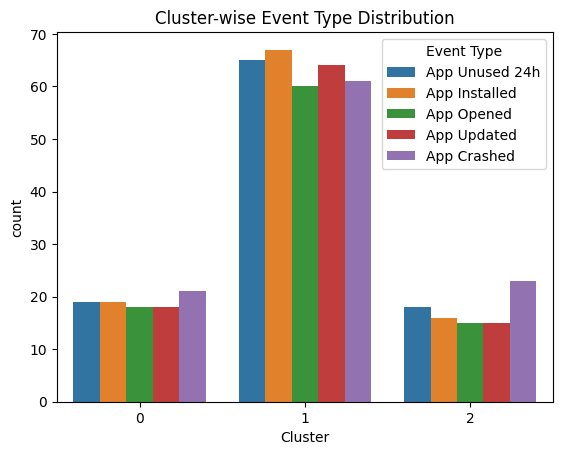

In [ ]:


# Visualize clusters vs event types
sns.countplot(data=df, x='Cluster', hue='Event Type')
plt.title("Cluster-wise Event Type Distribution")
plt.show()


# 🧪 STEP 4: Time Series
- Aggregating events over time to see patterns:

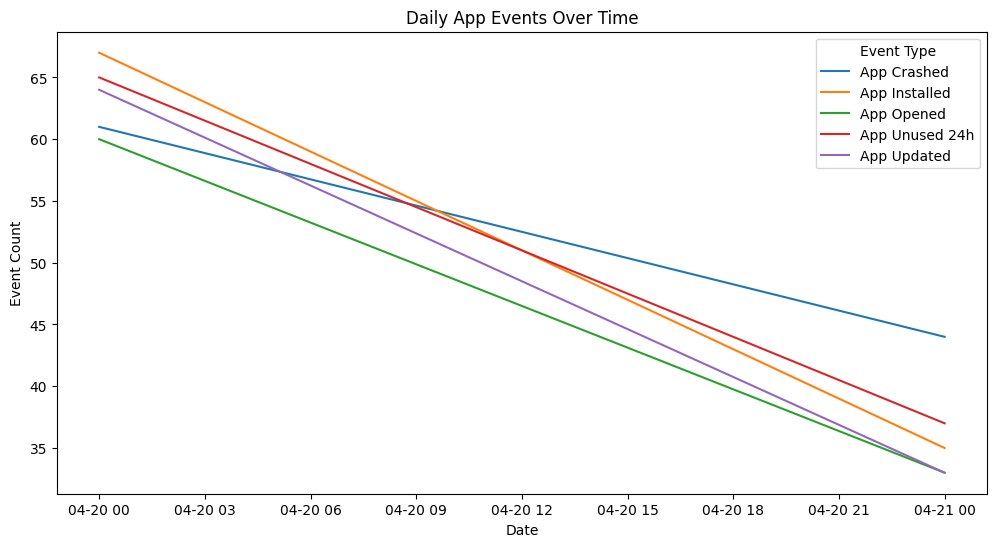

In [ ]:
# Daily count of events
df['Date'] = df['Timestamp'].dt.date
daily_events = df.groupby(['Date', 'Event Type']).size().unstack().fillna(0)

daily_events.plot(kind='line', figsize=(12, 6), title='Daily App Events Over Time')
plt.ylabel("Event Count")
plt.show()


# 🛠️ 4. Build a Dashboard
- create a Streamlit or Tableau dashboard to monitor:

- Which apps are updated most often

- Network performance

- Most active time for app interactions

## 🧑‍💻 STEP 5: Streamlit Dashboard
- Basic layout:

## ✅ DONE!
You now have:

Feature-rich dataset ✅

EDA + visualizations ✅

A classifier model ✅

Clustering insights ✅

Time series analysis ✅

Option to deploy dashboard ✅

# 5. Feature Engineering
Create new features that might help:

📌 Ideas:

Time since last update

Device popularity

Whether user is on mobile data vs Wi-Fi

OS version groupings (e.g., major versions)

# 6. Model Building (if predictive task)
If your goal involves prediction (e.g., will app crash happen?), you can go for:

Classification: Logistic Regression, Random Forest, XGBoost

Clustering (if you're segmenting users or devices): K-Means

Time Series Analysis (for trends): ARIMA, Prophet

Split your data into train/test or use cross-validation.

#  7. Model Evaluation
Based on task:

Accuracy, Precision, Recall, F1 for classification

Silhouette Score for clustering

RMSE, MAE for regression

Use confusion matrix, ROC curve, feature importance plots, etc.

# 8. Insights & Reporting
Summarize your findings:

Key factors causing crashes?

Peak hours of usage?

Devices that are more error-prone?

Visual dashboards: Power BI, Tableau, or even plotly Dash.

# 9. Deployment (Optional)
If you want to put the model in production:

Use Flask/FastAPI for API

Store model with joblib/pickle

Monitor performance over time

# 10. Documentation & Next Steps
Keep a well-documented Jupyter Notebook or script

Write clear README if it's a GitHub project

Think about data drift or adding new features later